In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import seaborn as sns
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt

## bayes opt

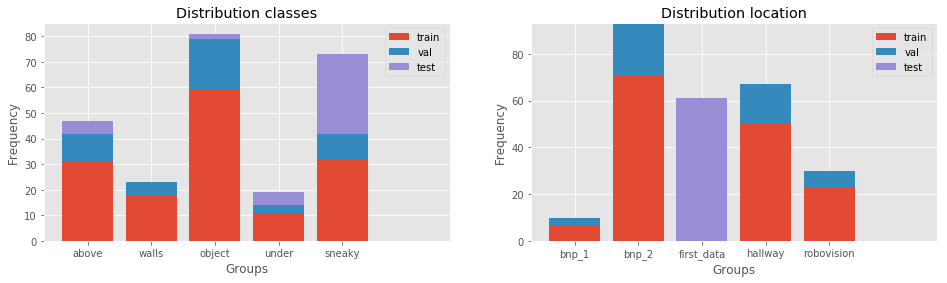

In [2]:
path                              =  './models/test_shuffle/first_data/DEEP2/bayes_opt/'
RD                                = retrieve_data()
data,dict_,path_best,hist_best    = RD.get_best_D1(path)
BO_vis                            = plotting_tool(dict_)

BO_vis.plot_dist(data)


### DEEP2

In [3]:
path                                  =  './models/test_shuffle/first_data/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')
AUC_t_a                               = RD.get_all(path,'AUC_t')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']
data['path_o']                        = path_best
RD.print_dict(dict_)
BO_vis                                = plotting_tool(dict_)

lr           : 0.0025075
time_dim     : 16
encoder      : [765, 373]
decoder      : [466]
vector       : 765
AUC_v        : 0.7662710674157305


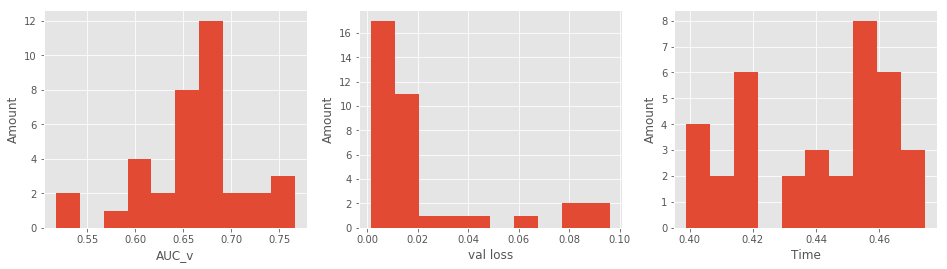

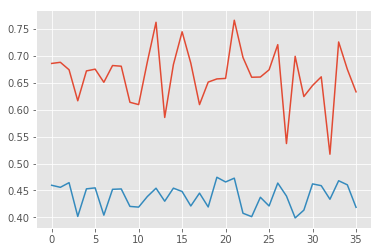

In [4]:
BO_vis.plot_dist_result(AUC_v_a,val_loss_a,AUC_t_a)
plt.plot(AUC_v_a)
plt.plot(AUC_t_a)

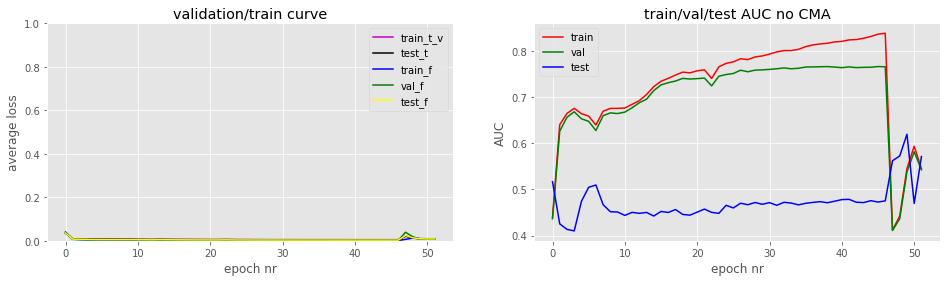

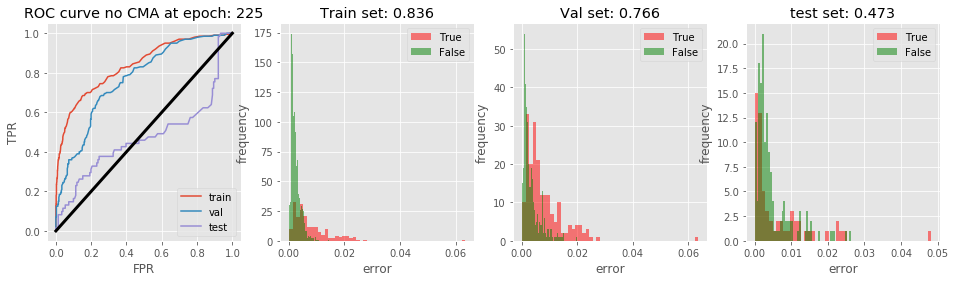

In [5]:
BO_vis.save_plots_no_cma(data)

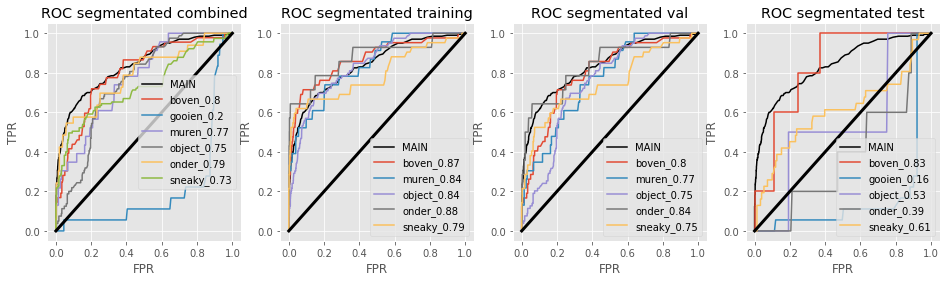

In [6]:
data_s = BO_vis._get_data_segmented(data,'segmentation')
BO_vis.save_ROC_segment(data_s,'segmentation')

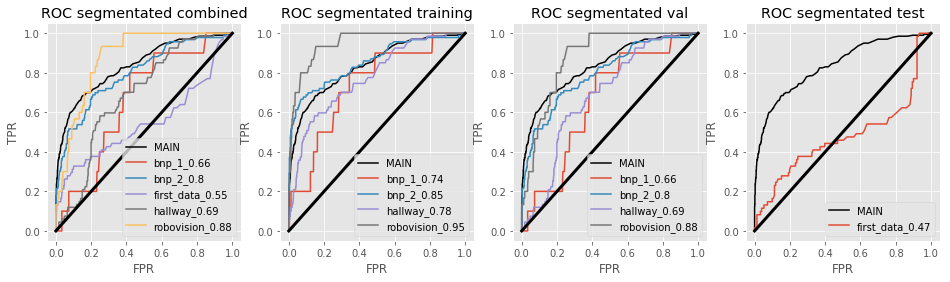

In [7]:
data_s = BO_vis._get_data_segmented(data,'location')
BO_vis.save_ROC_segment(data_s,'location')

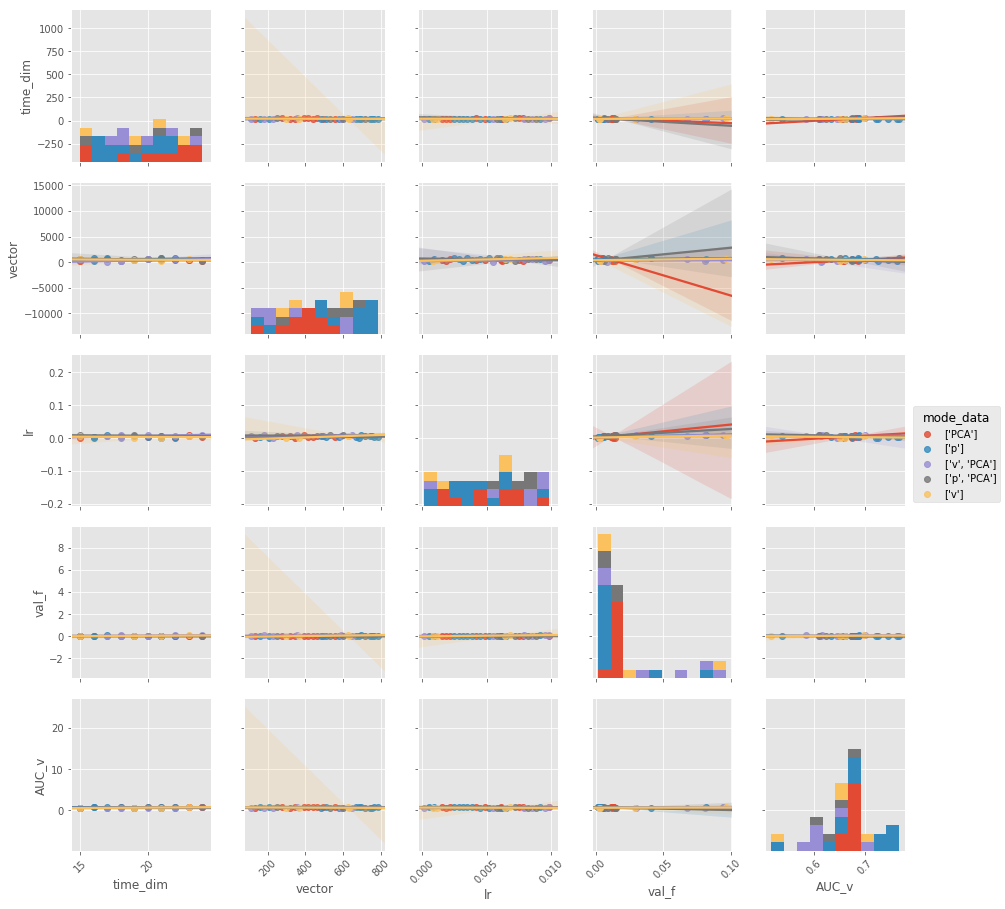

In [8]:
df = RD.get_scatter_data(path,['time_dim','vector','lr','val_f','mode_data'])
df['AUC_v'] = RD.get_all(path,'AUC_v')

g = sns.pairplot(df, diag_kind="hist",kind = 'reg',hue ='mode_data')
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)